# Lab: Data Cleaning & Preprocessing with NumPy & Pandas


## Dataset (primary)

We'll use the Titanic passenger dataset (mixed numeric/categorical and contains missing values):

**CSV URL:** `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`

(Alternate dataset: UCI Adult dataset: `https://archive.ics.uci.edu/ml/datasets/adult`)


### Dataset Description (Short) Titanic Dataset — Short Description

The Titanic dataset contains information about the passengers aboard the RMS Titanic when it sank in 1912. It is commonly used for classification tasks, especially predicting whether a passenger survived the disaster.

Key Features:
Survived – Target column (0 = No, 1 = Yes)
Pclass – Passenger class (1st, 2nd, 3rd)
Name – Passenger’s full name, including title
Sex – Gender
Age – Passenger age in years
SibSp – Number of siblings/spouses aboard
Parch – Number of parents/children aboard
Ticket – Ticket number
Fare – Ticket fare paid
Cabin – Cabin number
Embarked – Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

What the dataset is used for
Survival prediction (classification)
Feature engineering (titles, family size, fare per person, etc.)
Handling missing data
Machine learning pipelines

### Data Cleaning Tasks

Basic inspection, Missing value handling, Cabin replacement, 
Embarked imputation, Age median filling

### Feature Engineering Tasks Added

Age group binning, Family size & family type, 
Title extraction from passenger names, Outlier detection for Fare, 
Interaction features (Age×Pclass, Fare per person), 
Log transformation for skewed Fare, IsAlone feature

In [1]:
# Setup - Run this cell first (installs are not required in Colab but included for completeness)
import sys
import numpy as np
import pandas as pd

DATA_URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(DATA_URL)
print("Loaded dataset with shape:", df.shape)
df.head()

Loaded dataset with shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Part A — Quick data inspection (10min)

Tasks:
1. Show first/last rows, shape, columns.
2. Get `info()`, `describe()`, and value counts for categorical columns.


In [2]:
# Part A - Inspection
print("Shape:", df.shape)
display(df.head())
display(df.tail())
display(df.info())
display(df.describe(include='all'))

# Example: value counts for 'Survived' and 'Embarked'
print('\nSurvived counts:')
print(df['Survived'].value_counts(dropna=False))
print('\nEmbarked counts:')
print(df['Embarked'].value_counts(dropna=False))

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN



Survived counts:
Survived
0    549
1    342
Name: count, dtype: int64

Embarked counts:
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


In [15]:
import numpy as np
samples = np.array([1, 2,3, 4, 5, 6, 7, 8, 9, 10, 11, 100])
# mean = samples.mean()
q1 = 3
q3 = 9
iqr = q3 -q1
lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr
print(q1, q3, iqr, lb, ub)
# print("outliers1: ", samples < [lb])
# print("outliers2: ", samples > ub)

3 9 6 -6.0 18.0


TypeError: '<' not supported between instances of 'list' and 'float'

In [18]:
samples < [lb, lb, lb, lb, lb, lb, lb, lb, lb, lb, lb, lb]

False

## Part B — Missing value analysis & handling (10 min)

Tasks:
1. Compute missing value counts and percentages per column.
2. Decide strategy: drop, fill with mode/median, or conditional imputation.


In [3]:
# Part B - Missing values analysis
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100
display(pd.DataFrame({'missing_count': missing_counts, 'missing_pct': missing_pct}).sort_values('missing_pct', ascending=False))

# Example handling strategies
df_clean = df.copy()

# Drop PassengerId (example: not useful for modeling)
cols_to_drop = ['PassengerId']
df_clean = df_clean.drop(columns=cols_to_drop)

# Fill Embarked with mode
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0]) #, inplace=True)

# Fill Age with median
age_median = df_clean['Age'].median()
df_clean['Age'].fillna(age_median) #, inplace=True)

# Cabin - many missing -> keep as 'Unknown' and extract Deck letter
df_clean['Cabin'] = df_clean['Cabin'].fillna('Unknown').astype(str)
df_clean['Deck'] = df_clean['Cabin'].str[0]
df_clean.loc[df_clean['Deck'] == 'U', 'Deck'] = 'Unknown'

print('\nAfter fills: missing value counts:')
display(df_clean.isnull().sum())

,missing_count,missing_pct
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000



After fills: missing value counts:


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      2
Deck          0
dtype: int64

<Axes: >

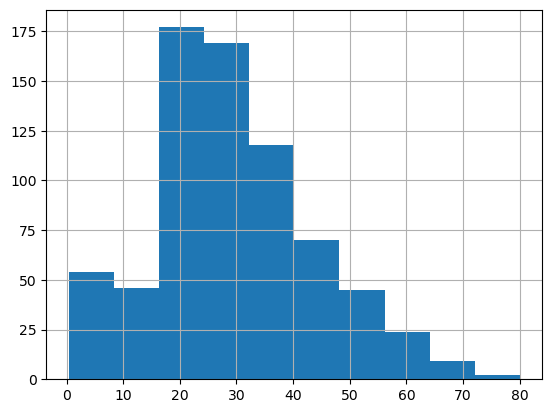

In [4]:
df['Age'].hist()

## Part C — Duplicates & inconsistent entries (10 min)

Tasks:
1. Check duplicates; remove if necessary.
2. Check for inconsistent strings (e.g., trailing spaces, case).


In [27]:
# df_clean['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [28]:
# df_clean['Embarked'].mode()[0]

'S'

In [12]:
# str1 = " I Love My india "

In [13]:
# str1.strip()

'I Love My india'

In [4]:
# Part C - Duplicates and string cleaning
dup_count = df_clean.duplicated().sum()
print("Duplicate rows:", dup_count)

# Optionally drop exact duplicates
df_clean = df_clean.drop_duplicates()

# Trim whitespace in string columns
str_cols = df_clean.select_dtypes(include='object').columns
for c in str_cols:
    df_clean[c] = df_clean[c].str.strip()

print("String columns cleaned. Sample:")
display(df_clean[str_cols].head())

Duplicate rows: 0
String columns cleaned. Sample:


,Name,Sex,Ticket,Cabin,Embarked,Deck
0,"Braund, Mr. Owen Harris",male,A/5 21171,Unknown,S,Unknown
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Unknown,S,Unknown
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,C
4,"Allen, Mr. William Henry",male,373450,Unknown,S,Unknown


## Part D — Data type corrections & parsing (10 min)

Tasks:
1. Ensure numeric columns are numeric.
2. Example of parsing date columns (not present in Titanic but shown for completeness).


In [5]:
# Part D - Data type corrections
# Ensure Fare is numeric
df_clean['Fare'] = pd.to_numeric(df_clean['Fare'], errors='coerce')

# Example for date parsing (uncomment if dataset has a date column named 'date_col')
# df_clean['date_col'] = pd.to_datetime(df_clean['date_col'], errors='coerce')

display(df_clean.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Deck         object
dtype: object

## Part E — Outlier detection & handling using IQR (15 min)

Tasks:
1. Identify outliers using IQR for numeric columns (e.g., Fare).
2. Cap outliers using winsorization (numpy.clip or percentile-based capping).


In [6]:
# Part E - Outlier handling using IQR
def cap_outliers_iqr(series, lower_q=0.25, upper_q=0.75):
    q1, q3 = series.quantile([lower_q, upper_q])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

df_clean['Fare_capped'] = cap_outliers_iqr(df_clean['Fare'])

# Show before/after stats
display(pd.DataFrame({
    'fare_mean': [df_clean['Fare'].mean(), df_clean['Fare_capped'].mean()],
    'fare_std' : [df_clean['Fare'].std(), df_clean['Fare_capped'].std()]
}, index=['original','capped']))

,fare_mean,fare_std
original,32.204208,49.693429
capped,24.046813,20.481625


## Part F — Encoding categorical variables (15 min)

Tasks:
1. Convert `Sex`, `Embarked`, `Deck` into numeric features.
2. Use `get_dummies` for one-hot encoding; show mapping for binary variables.


In [7]:
# Part F - Encoding categorical variables
# Binary mapping for Sex
df_clean['Sex_num'] = df_clean['Sex'].map({'male': 0, 'female': 1})

# One-hot for Embarked and Deck (drop_first optional)
df_encoded = pd.get_dummies(df_clean, columns=['Embarked','Deck'], prefix=['Emb','Deck'], drop_first=True)

# Drop original non-useful text columns
cols_drop_after = ['Name','Ticket','Cabin','Sex']
for c in cols_drop_after:
    if c in df_encoded.columns:
        df_encoded = df_encoded.drop(columns=[c])

display(df_encoded.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_capped,Sex_num,Emb_Q,Emb_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown
0,0,3,22.0,1,0,7.2500,7.2500,0,False,True,False,False,False,False,False,False,False,True
1,1,1,38.0,1,0,71.2833,65.6344,1,False,False,False,True,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,7.9250,1,False,True,False,False,False,False,False,False,False,True
3,1,1,35.0,1,0,53.1000,53.1000,1,False,True,False,True,False,False,False,False,False,False
4,0,3,35.0,0,0,8.0500,8.0500,0,False,True,False,False,False,False,False,False,False,True


## Part G — Scaling numeric features (without sklearn) (10 min)

Tasks:
1. Standardize Age and Fare using numpy.


In [8]:
# Part G - Scaling features manually (standardization and min-max)
for col in ['Age','Fare_capped']:
    if col in df_encoded.columns:
        mean = df_encoded[col].mean()
        std = df_encoded[col].std(ddof=0)
        df_encoded[col + '_std'] = (df_encoded[col] - mean) / std
        minv = df_encoded[col].min()
        maxv = df_encoded[col].max()
        df_encoded[col + '_minmax'] = (df_encoded[col] - minv) / (maxv - minv)

display(df_encoded[['Age','Age_std','Age_minmax','Fare_capped','Fare_capped_std','Fare_capped_minmax']].head())

,Age,Age_std,Age_minmax,Fare_capped,Fare_capped_std,Fare_capped_minmax
0,22.0,-0.565736,0.271174,7.2500,-0.820552,0.110460
1,38.0,0.663861,0.472229,65.6344,2.031623,1.000000
2,26.0,-0.258337,0.321438,7.9250,-0.787578,0.120745
3,35.0,0.433312,0.434531,53.1000,1.419297,0.809027
4,35.0,0.433312,0.434531,8.0500,-0.781471,0.122649


## Part G — Feature Transformation Tasks (without sklearn) (10 min)

Tasks:
1. Age group binning

2. Family size & family type

3. Title extraction from passenger names

4. Outlier detection for Fare

5. Interaction features (Age×Pclass, Fare per person)

6. Log transformation for skewed Fare

7. IsAlone feature


In [13]:
# 1. Age group binning

bins=[0,12,18,35,60,100]
labels=['Child','Teen','Young Adult','Adult','Senior']
df['AgeGroup']=pd.cut(df['Age'],bins=bins,labels=labels)
df[['Age','AgeGroup']].head()

,Age,AgeGroup
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


In [19]:
# 2. Family size & family type

df['FamilySize']=df['SibSp']+df['Parch']+1
df['FamilyType']=pd.cut(df['FamilySize'],bins=[0,1,4,11],labels=['Single','Small','Large'])
df[['FamilySize','FamilyType']].head()

,FamilySize,FamilyType
0,2,Small
1,2,Small
2,1,Single
3,2,Small
4,1,Single


In [14]:
# 3. Title extraction from passenger names

df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
rare=['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df['Title']=df['Title'].replace(rare,'Rare')
df['Title'].value_counts()

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Dr. Bhavesh Dharmani\AppData\Local\Temp\ipykernel_17284\497697666.py:3: SyntaxWarning: invalid escape sequence '\.'
  df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)


Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       23
Mlle        2
Mme         1
Ms          1
Name: count, dtype: int64

In [15]:
# 4. Outlier detection for Fare
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
df['Fare_Outlier']=((df['Fare']<Q1-1.5*IQR)|(df['Fare']>Q3+1.5*IQR)).astype(int)
df['Fare_Outlier'].value_counts()


Fare_Outlier
0    775
1    116
Name: count, dtype: int64

In [20]:
# 5. Interaction features (Age×Pclass, Fare per person)

df['Age_Pclass']=df['Age']*df['Pclass']
df['Fare_Per_Person']=df['Fare']/df['FamilySize']
df[['Age_Pclass','Fare_Per_Person']].head()

,Age_Pclass,Fare_Per_Person
0,66.0,3.62500
1,38.0,35.64165
2,78.0,7.92500
3,35.0,26.55000
4,105.0,8.05000


In [17]:
# 6. Log transformation for skewed Fare

df['Fare_log']=np.log1p(df['Fare'])
df[['Fare','Fare_log']].head()

,Fare,Fare_log
0,7.2500,2.110213
1,71.2833,4.280593
2,7.9250,2.188856
3,53.1000,3.990834
4,8.0500,2.202765


In [21]:
# 7. IsAlone feature

df['IsAlone']=(df['FamilySize']==1).astype(int)
df[['FamilySize','IsAlone']].head()

,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


## Part H — Train/Test split using NumPy (5–10 min)

Tasks:
1. Create reproducible split (no sklearn).


In [9]:
# Part H - Reproducible train/test split using numpy
np.random.seed(42)
perm = np.random.permutation(len(df_encoded))
train_idx = perm[:int(0.8 * len(df_encoded))]
test_idx  = perm[int(0.8 * len(df_encoded)):]

train_df = df_encoded.iloc[train_idx].reset_index(drop=True)
test_df  = df_encoded.iloc[test_idx].reset_index(drop=True)

print("Train shape:", train_df.shape, "Test shape:", test_df.shape)

Train shape: (712, 22) Test shape: (179, 22)


## Part I — Save cleaned data & short report (5 min)

Tasks:
1. Save cleaned CSVs.
2. Prepare a short report (markdown) listing cleaning steps and reasons.


In [11]:
# Part I - Save cleaned datasets
output_train = "titanic_train_cleaned.csv"
output_test  = "titanic_test_cleaned.csv"
train_df.to_csv(output_train, index=False)
test_df.to_csv(output_test, index=False)
print("Saved cleaned files:")
print(output_train)
print(output_test)

Saved cleaned files:
titanic_train_cleaned.csv
titanic_test_cleaned.csv


## Submission checklist & assessment rubric

**Students should submit:**
- Executed notebook (Colab link or .ipynb)
- `titanic_train_cleaned.csv` and `titanic_test_cleaned.csv`
- `cleaning_report.md` (1 page) explaining decisions

**Suggested Rubric:**
- Code & reproducibility: 30%
- Correctness of cleaning: 30%
- Justification & documentation: 25%
- Extras & clarity: 15%


## Extension tasks (optional)

1. Compare two imputation strategies for `Age` — median vs group-wise median (by `Pclass` and `Sex`) and evaluate downstream effect.
2. Add visualizations: missing-value heatmap, boxplots pre/post capping, correlation heatmap.
3. Repeat lab with UCI Adult dataset to practice handling many categorical variables.

---

## Short quiz
1. Why might you prefer median imputation over mean imputation?
2. What are risks of dropping rows with missing values?
3. When is one-hot encoding less desirable? What alternatives exist?
4. Explain difference between standardization and min-max scaling; when to use each.
